# Heart Disease Diagnostic Analysis

In this project, we delve into the realm of cardiovascular health by conducting an Data Analysis on a dataset related to heart disease diagnostics. The dataset contains various features such as age, sex, cholesterol levels, and exercise-induced angina, among others, which are potential indicators of heart disease. Through this analysis, we aim to gain insights into the relationships between these features and the target variable, which indicates the presence or absence of heart disease.

### Objective 

-> Data Visualization to identify patterns and relationships
-> Correlation analysis to understand the relationships between        features
-> Distribution of the target variable
-> Identification of potential risk factors for heart disease

In [1]:
#Import the necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the Csv File 
df=pd.read_csv(r"C:\Users\ADMIN\Documents\Heart Disease data.csv")

In [3]:
#Top 5 rows of a dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

There are 14 features in the dataset

In [7]:
#checking null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From the above info..we conclude there is no missing values in our dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
rows, columns=df.shape
print(f"No of rows:{rows}")
print(f"No of Columns:{columns}")

No of rows:1025
No of Columns:14


From the Dataset.....!

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)

In [10]:
#percentage of people having a Heart Disease
num=df.groupby('target').size()
num

target
0    499
1    526
dtype: int64

In [11]:
#Converting numerical data into categorical data
def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [12]:
#applying converted data into our dataset with new column- Heart_Disease
df['Heart_Disease']=df['target'].apply(heart_disease)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence


In [14]:
hd=df.groupby('Heart_Disease')['target'].count()
hd

Heart_Disease
Absence     499
Presence    526
Name: target, dtype: int64

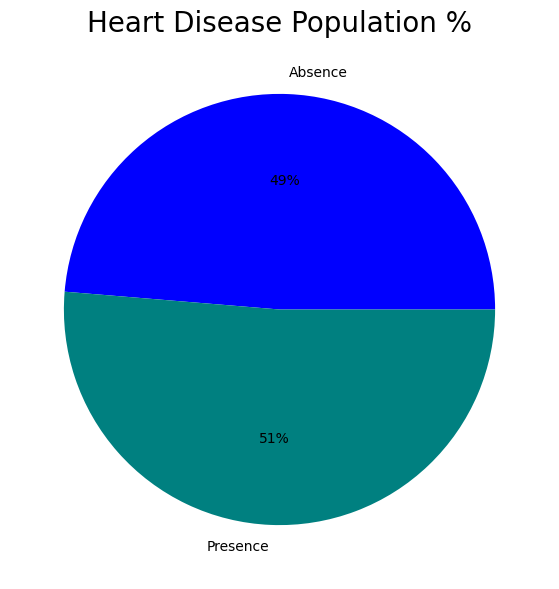

In [20]:
# Pie chart for showing the Percentage of Heart Disease using Matplotlib
plt.figure(figsize=(10,7))
plt.pie(hd, labels=['Absence','Presence'], autopct='%0.0f%%',colors=['blue','teal'])
plt.title('Heart Disease Population %', fontsize=20)
plt.show()
     

From the above diagram, people having heart disease (51%) and the people do not have heart disease (49%)

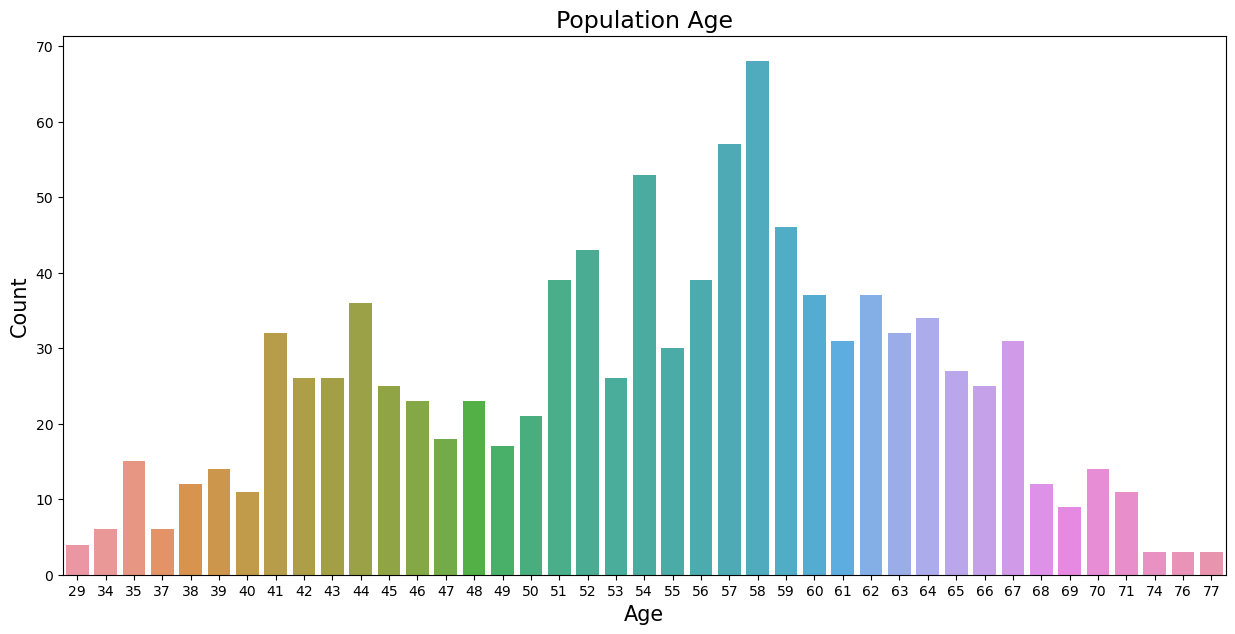

In [20]:
#Countplot Creation of Population Age using MatplotLib and Seaborn
plt.figure(figsize=(15,7))
sns.countplot(x='age', data=HeartDisease_df)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In this section, the best analysis can be divided into the elderly,middle-aged, young people by looking at the age ranges.

In [16]:
#Statistical Analysis
Min_Age=df['age'].min()
Max_Age=df['age'].max()
Mean_Age=df['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)
     

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.43414634146342


In [21]:
#Categorical Analysis
Young_Ages=df[(df['age']>=29) & (df['age']<40)]
Middle_Ages=df[(df['age']>=40) & (df['age']<55)]
Elderly_Ages=df[(df['age']>55)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 57
Middle Ages = 419
Elderly Ages = 519


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


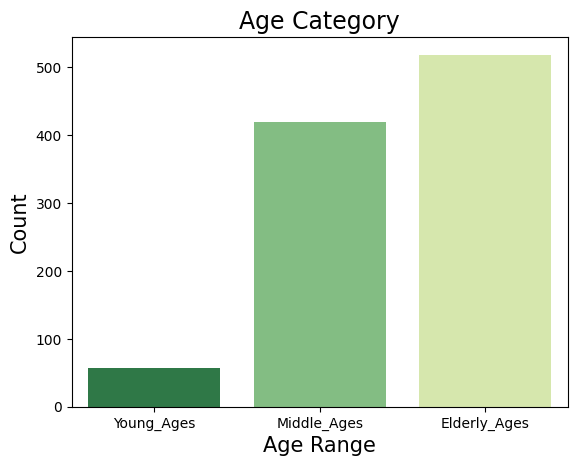

In [22]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn
sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='YlGn_r')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [23]:
#Converting Numerical Data into Categorical Data
def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [25]:
#Applying converted data into our dataset with new column - sex1
df['Gender']=df['sex'].apply(gender)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,Gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female


In [26]:
#Converting Numerical Data into Categorical Data
def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'
     

In [27]:
#Applying converted data into our dataset with new column - Age_Range
df['Age_Range']=df['age'].apply(age_range)
df.head()
     

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,Gender,Age_Range
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder Age
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder Age
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder Age


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ADMIN\anaco

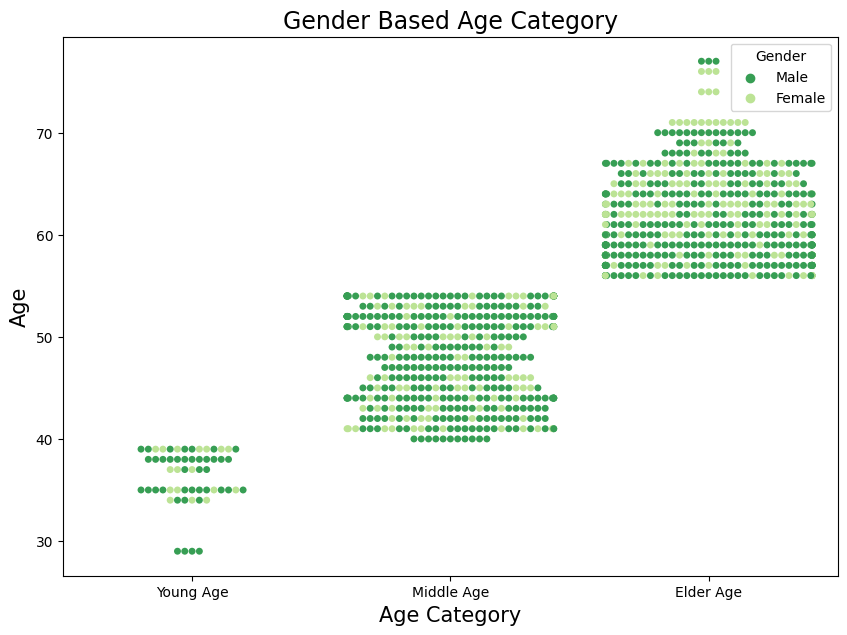

In [32]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn
plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='age', hue='Gender', data=df, order=['Young Age','Middle Age','Elder Age'], palette='YlGn_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()
     

From Our Population chart we can say that Number Of Males are more in Middle Age Category and Females are more in Elder Age Category.



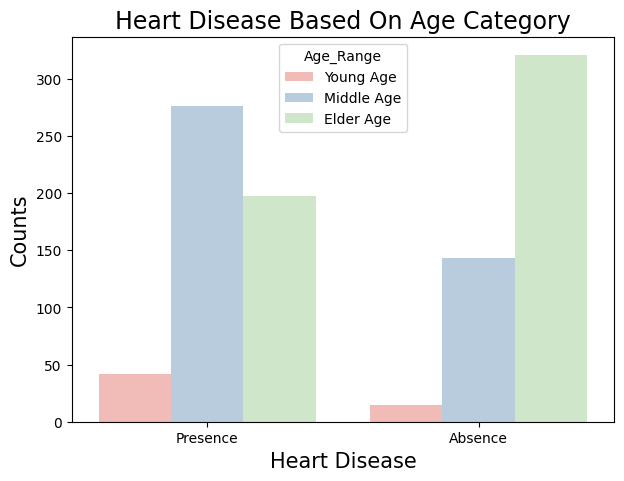

In [36]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn
plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=df, order=['Presence','Absence'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()
     

Middle Age People are most AFFECTED by Heart Disease and Elder Age People are mostly FREE from any kind of Heart Disease.

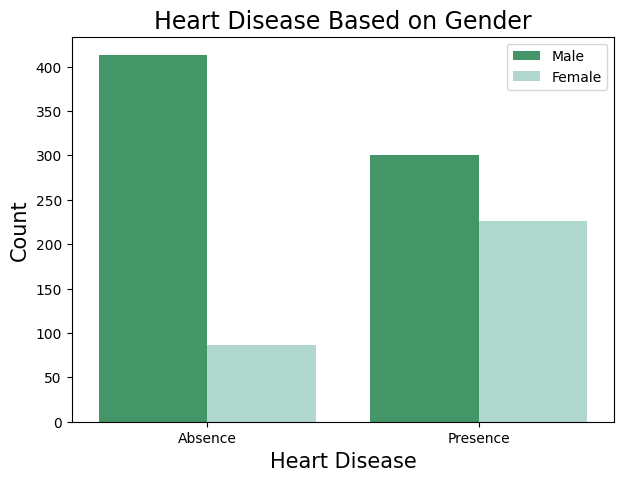

In [37]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn
plt.figure(figsize=(7,5))
sns.countplot(x=df['Heart_Disease'], hue='Gender', data=df, palette='BuGn_r')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()


We can see that Males are more prone to Heart Disease

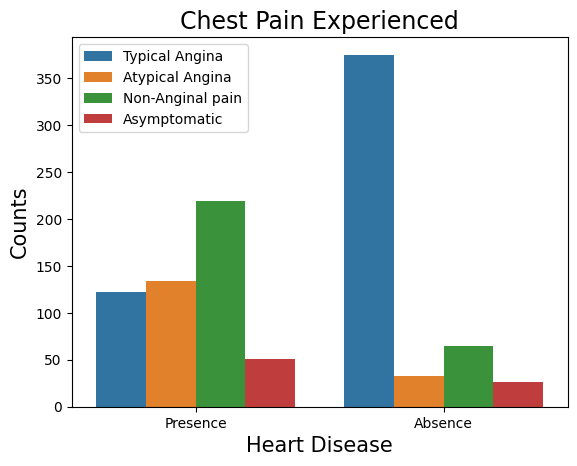

In [38]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn
sns.countplot(x=df['Heart_Disease'], hue='cp', data=df, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()
     

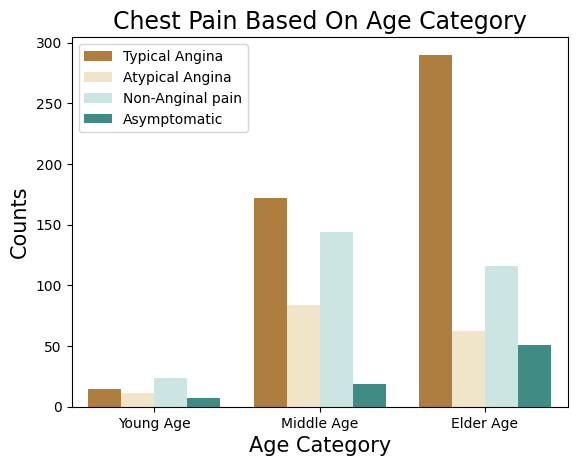

In [39]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn
sns.countplot(x=df['Age_Range'], hue='cp', data=df, order=['Young Age', 'Middle Age', 'Elder Age'], palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()
     

There is very high number of Typical Angina Pain in Elderly age Category

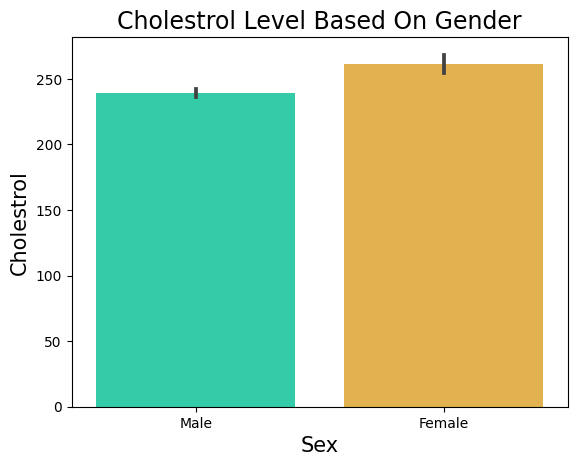

In [40]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn
sns.barplot(x='Gender', y='chol', data=df, palette='turbo')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()
     

Females have little bit of higher cholesterol than males.

In [41]:
#Converting Numerical Data into Categorical Data
def chest_pain(row):
    if row==0:
        return 'Typical Angina'
    elif row==1:
        return 'Atypical Angina'
    elif row==2:
        return 'Non-Anginal pain'
    elif row==3:
        return 'Asymptomatic'

In [43]:
#Applying converted data into our dataset with new column - Chest Pain
df['Chest pain']=df['cp'].apply(chest_pain)
df.head()
     


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,Gender,Age_Range,Chest pain
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Absence,Male,Middle Age,Typical Angina
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Absence,Male,Middle Age,Typical Angina
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Absence,Male,Elder Age,Typical Angina
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Absence,Male,Elder Age,Typical Angina
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Absence,Female,Elder Age,Typical Angina


In [44]:
df.rename(columns ={'trestbps': 'Blood Pressure', 'chol': 'Cholestrol','thalach': 'Max Hearth Rate'}, inplace=True)
     

In [45]:
df.drop(['sex', 'target'], axis=1, inplace=True)
     

In [46]:
df.head()

,age,cp,Blood Pressure,Cholestrol,fbs,restecg,Max Hearth Rate,exang,oldpeak,slope,ca,thal,Heart_Disease,Gender,Age_Range,Chest pain
0,52,0,125,212,0,1,168,0,1.0,2,2,3,Absence,Male,Middle Age,Typical Angina
1,53,0,140,203,1,0,155,1,3.1,0,0,3,Absence,Male,Middle Age,Typical Angina
2,70,0,145,174,0,1,125,1,2.6,0,0,3,Absence,Male,Elder Age,Typical Angina
3,61,0,148,203,0,1,161,0,0.0,2,1,3,Absence,Male,Elder Age,Typical Angina
4,62,0,138,294,1,1,106,0,1.9,1,3,2,Absence,Female,Elder Age,Typical Angina


In [47]:
df.isnull().sum()


age                 0
cp                  0
Blood Pressure      0
Cholestrol          0
fbs                 0
restecg             0
Max Hearth Rate     0
exang               0
oldpeak             0
slope               0
ca                  0
thal                0
Heart_Disease       0
Gender              0
Age_Range          30
Chest pain          0
dtype: int64

In [48]:
# Filling the null values with Not available in the Age range columns
df['Age_Range'].fillna('Not Available', inplace=True)
     


In [49]:
# Again checking for null values
df.isnull().sum()
     


age                0
cp                 0
Blood Pressure     0
Cholestrol         0
fbs                0
restecg            0
Max Hearth Rate    0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
Heart_Disease      0
Gender             0
Age_Range          0
Chest pain         0
dtype: int64

In [50]:
# Converting the Heart disease dataframe into a CSV file
df.to_csv('Final Heart Disease data.csv')

In conclusion, the analysis of this heart disease diagnostic dataset provides valuable insights into the factors influencing the presence or absence of heart disease. By leveraging advanced analytics and predictive modeling techniques, we can strive towards improving diagnostic accuracy, patient outcomes, and overall cardiovascular health management.